## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_df = pd.merge(left= mouse_metadata, right = study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = len(mouse_study_data_df["Mouse ID"].value_counts())
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

has_duplicate = mouse_study_data_df.duplicated(["Mouse ID", "Timepoint"])
duplicate_mouseid = mouse_study_data_df.loc[has_duplicate, "Mouse ID"]

duplicate_mice = duplicate_mouseid.unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouseid_df = duplicate_mouseid
all_duplicate_mouseid_df


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# clean_df = mouse_study_data_df.loc[(mouse_study_data_df["Mouse ID"] == duplicate_mice), :]

# clean_df = mouse_study_data_df.drop(mouse_study_data_df.loc[(mouse_study_data_df["Mouse ID"] == duplicate_mice), :])

clean_df = mouse_study_data_df[mouse_study_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df

# clean_df = mouse_study_data_df.drop(mouse_study_data_df.loc[(mouse_study_data_df["Mouse ID"] == duplicate_mice), :)])

# clean_mouse_study_df = mouse_study_data_df.drop_duplicates(mouse_study_data_df["Mouse ID"] == duplicate_mice, keep = False)
# clean_mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(clean_df["Mouse ID"].value_counts())
new_total_mice

248

## Summary Statistics

In [8]:
drug_regimen = [clean_df["Drug Regimen"].unique()]
drug_regimen

[array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
        'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
       dtype=object)]

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

groupby_drug = clean_df.groupby(["Drug Regimen"])

mean_summary = groupby_drug["Tumor Volume (mm3)"].mean()
median_summary = groupby_drug["Tumor Volume (mm3)"].median()
var_summary = groupby_drug["Tumor Volume (mm3)"].var()
std_summary = groupby_drug["Tumor Volume (mm3)"].std()
sem_summary = groupby_drug["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({ "mean" : mean_summary,
                           "median" : median_summary,
                           "var" : var_summary,
                          "std": std_summary,
                          "sem" : sem_summary
                          })
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

single_groupby = clean_df.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
single_groupby





,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [121]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

group_mice_treatment = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
pandas_mice_treatment = group_mice_treatment.reset_index()
pandas_mice_treatment = pandas_mice_treatment.set_index("Drug Regimen")
pandas_mice_treatment

# new_mice_treatment = group_mice_treatment [["Drug Regimen", "Mouse ID"]]

# pandas_mice_treatment = new_mice_treatment.set_index(["Drug Regimen"])
# pandas_mice_treatment = pandas_mice_treatment.rename(columns = {"Mouse ID" : "Total number of Mice"})
# pandas_mice_treatment



,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


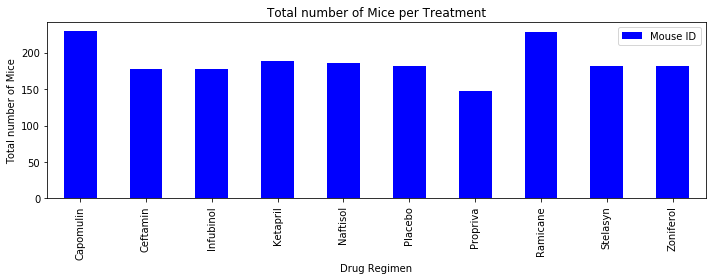

In [126]:
pandas_mice_treatment.plot(kind = "bar",  color = "blue", figsize = (10, 4))
# pandas_mice_treatment.set_ylabel("Total number of Mice")

plt.title("Total number of Mice per Treatment")
plt.ylabel("Total number of Mice")
plt.tight_layout()
plt.show()

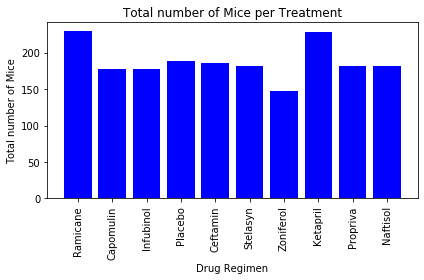

In [155]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# group_mice_treatment = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
# unique_treatment = group_mice_treatment.unique()

x_axis = np.arange(0, len(group_mice_treatment))
x_axis


tick_name = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
        'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']



plt.bar(x_axis, new_mice_treatment["Mouse ID"], color = "blue", align = "center")
plt.xticks(x_axis, tick_name, rotation = "vertical")
# plt.figure(figsize=(10,4))
plt.title("Total number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Mice")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Female vs Male Mice Distribution')

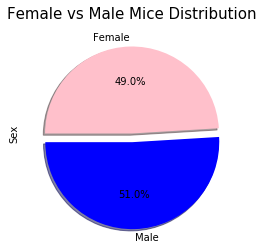

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
color = ["blue", "pink"]
explode = [0.10, 0]
mice_gender = clean_df["Sex"].value_counts()
mice_gender.plot(kind = "pie", autopct="%1.1f%%", colors = color, explode = explode, shadow = True, startangle = 180)
plt.title("Female vs Male Mice Distribution", fontsize = 15)
# plt.axis = "equal"
# plt.axis = "off"

# figsize = (30,4)


/Users/preeti/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


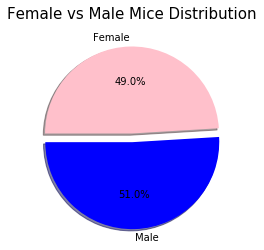

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
color = ["blue", "pink"]
explode = [0.10, 0]
labels = ["Male", "Female"]
sizes = [clean_df["Sex"].value_counts()]

plt.pie(sizes, colors = color, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, startangle = 180)
plt.title("Female vs Male Mice Distribution", fontsize = 15)
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin_tumor_volume = capomulin_df.groupby(["Mouse ID"]).max()["Tumor Volume (mm3)"]
capomulin_tumor_volume

capomulin_last_time = pd.merge(left = mouse_study_data_df, right = capomulin_tumor_volume, on = "Mouse ID", how = "right")
new = capomulin_last_time["Tumor Volume (mm3)_x"].max()

new



48.15820939

In [17]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
